In [1]:
import numpy as np
import xarray as xr
#from dask.diagnostics import ProgressBar
from xgcm import Grid
from matplotlib import pyplot as plt
import dask
import dask.array as dsa
#import cartopy.crs as ccrs
#import cartopy.feature as cfeature
#from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

%matplotlib inline

In [2]:
datapath = '/scratch/fu5/cgk561/eac/20year_freerun_NEW/output_heatbudget/'
diag_t = xr.open_mfdataset(datapath + 'outer_dia_014*.nc', chunks={'ocean_time': 1}, combine='nested'
                           ,concat_dim="ocean_time", data_vars='minimal', drop_variables = ['dstart', 'ntimes','nRST'])
ts = xr.open_mfdataset(datapath + 'outer_avg_014*.nc', chunks={'ocean_time': 1}, combine='nested'
                           ,concat_dim="ocean_time", data_vars='minimal', drop_variables = ['dstart', 'ntimes','nRST'])

In [3]:
print('Total Size: %6.2F GB' % (diag_t.nbytes / 1e9))

Total Size:  40.54 GB


In [4]:
print('Total Size: %6.2F GB' % (ts.nbytes / 1e9))

Total Size:  30.78 GB


## Subset by time and space to make things a bit faster

In [5]:
#Sydney Box
i = 116         # southward boundary
ii = 124         # northward boundary
j = 70         # westward boundary
jj = 80         # eastward boundary
ds = ts.isel(eta_psi=slice(i,ii-1), eta_rho=slice(i,ii), eta_u=slice(i,ii), eta_v=slice(i,ii-1),
               xi_psi=slice(j,jj-1), xi_rho=slice(j,jj), xi_u=slice(j,jj-1), xi_v=slice(j,jj))

diag = diag_t.isel(eta_psi=slice(i,ii-1), eta_rho=slice(i,ii), eta_u=slice(i,ii), eta_v=slice(i,ii-1),
               xi_psi=slice(j,jj-1), xi_rho=slice(j,jj), xi_u=slice(j,jj-1), xi_v=slice(j,jj))

print('Total Size: %6.2F GB' % (ds.nbytes / 1e9))
print('Total Size: %6.2F GB' % (diag.nbytes / 1e9))

Total Size:   0.03 GB
Total Size:   0.04 GB


In [106]:
diag

<xarray.Dataset>
Dimensions:      (Nuser: 25, boundary: 4, eta_psi: 7, eta_rho: 8, eta_u: 8, eta_v: 7, ocean_time: 365, s_rho: 30, s_w: 31, tracer: 2, xi_psi: 9, xi_rho: 10, xi_u: 9, xi_v: 10)
Coordinates:
    lat_v        (eta_v, xi_v) float64 dask.array<chunksize=(7, 10), meta=np.ndarray>
    lon_u        (eta_u, xi_u) float64 dask.array<chunksize=(8, 9), meta=np.ndarray>
    lon_psi      (eta_psi, xi_psi) float64 dask.array<chunksize=(7, 9), meta=np.ndarray>
    lat_psi      (eta_psi, xi_psi) float64 dask.array<chunksize=(7, 9), meta=np.ndarray>
    lat_rho      (eta_rho, xi_rho) float64 dask.array<chunksize=(8, 10), meta=np.ndarray>
    lon_v        (eta_v, xi_v) float64 dask.array<chunksize=(7, 10), meta=np.ndarray>
    lon_rho      (eta_rho, xi_rho) float64 dask.array<chunksize=(8, 10), meta=np.ndarray>
    lat_u        (eta_u, xi_u) float64 dask.array<chunksize=(8, 9), meta=np.ndarray>
  * s_rho        (s_rho) float64 -0.9715 -0.9156 -0.8614 ... -0.0156 -0.004799
  * s_w          (s_w) float64 -1.0 -0.9433 -0.8883 ... -0.02161 -0.01 0.0
  * ocean_time   (ocean_time) datetime64[ns] 1994-01-01T12:00:00 ... 1994-12-31T12:00:00
Dimensions without coordinates: Nuser, boundary, eta_psi, eta_rho, eta_u, eta_v, tracer, xi_psi, xi_rho, xi_u, xi_v
Data variables:
    f            (eta_rho, xi_rho) float64 dask.array<chunksize=(8, 10), meta=np.ndarray>
    angle        (eta_rho, xi_rho) float64 dask.array<chunksize=(8, 10), meta=np.ndarray>
    ntsAVG       int32 ...
    Tcline       float64 ...
    mask_psi     (eta_psi, xi_psi) float64 dask.array<chunksize=(7, 9), meta=np.ndarray>
    hc           float64 ...
    Tnudg        (tracer) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    M3nudg       float64 ...
    gamma2       float64 ...
    ndefHIS      int32 ...
    M2obc_out    (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    nl_tnu2      (tracer) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    M3obc_out    (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    pn           (eta_rho, xi_rho) float64 dask.array<chunksize=(8, 10), meta=np.ndarray>
    Akv_bak      float64 ...
    Akt_bak      (tracer) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    Fbeta        float64 ...
    Cs_r         (s_rho) float64 dask.array<chunksize=(30,), meta=np.ndarray>
    theta_b      float64 ...
    Tobc_out     (boundary, tracer) float64 dask.array<chunksize=(4, 2), meta=np.ndarray>
    mask_rho     (eta_rho, xi_rho) float64 dask.array<chunksize=(8, 10), meta=np.ndarray>
    nHIS         int32 ...
    Zos          float64 ...
    rho0         float64 ...
    M2obc_in     (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    mask_u       (eta_u, xi_u) float64 dask.array<chunksize=(8, 9), meta=np.ndarray>
    Vtransform   int32 ...
    pm           (eta_rho, xi_rho) float64 dask.array<chunksize=(8, 10), meta=np.ndarray>
    Akk_bak      float64 ...
    Vstretching  int32 ...
    Cs_w         (s_w) float64 dask.array<chunksize=(31,), meta=np.ndarray>
    user         (Nuser) float64 dask.array<chunksize=(25,), meta=np.ndarray>
    Falpha       float64 ...
    Tobc_in      (boundary, tracer) float64 dask.array<chunksize=(4, 2), meta=np.ndarray>
    ntsDIA       int32 ...
    rdrg         float64 ...
    nDIA         int32 ...
    Fgamma       float64 ...
    dtfast       float64 ...
    nAVG         int32 ...
    nl_visc2     float64 ...
    M3obc_in     (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    el           float64 ...
    Akp_bak      float64 ...
    M2nudg       float64 ...
    h            (eta_rho, xi_rho) float64 dask.array<chunksize=(8, 10), meta=np.ndarray>
    theta_s      float64 ...
    dt           float64 ...
    ndtfast      int32 ...
    ndefAVG      int32 ...
    Znudg        float64 ...
    FSobc_in     (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    rdrg2        float64 ...
    Zob          float64 ...
    ndefDIA      int32

# Creating a grid object
While xgcm doesn't currently have an implementation for the SGRID convention for ROMS, a workaround consist on renaming eta_u and xi_v dimensions to rho. With this replacement 'psi' points have now a position (eta_v, xi_u). See issue here https://github.com/xgcm/xgcm/issues/108

Here I also test to see if the new XGCM 'metrics' functionality works.

In [6]:
# Including metrics
ds = ds.rename({'eta_u': 'eta_rho', 'xi_v': 'xi_rho', 'xi_psi': 'xi_u', 'eta_psi': 'eta_v'})

coords={'X':{'center':'xi_rho', 'inner':'xi_u'}, 
    'Y':{'center':'eta_rho', 'inner':'eta_v'}, 
    'Z':{'center':'s_rho', 'outer':'s_w'}}

grid = Grid(ds, coords=coords, periodic=[])

Zo_rho = (ds.hc * ds.s_rho + ds.Cs_r * ds.h) / (ds.hc + ds.h)
z_rho = Zo_rho * (ds.zeta + ds.h) + ds.zeta
Zo_w = (ds.hc * ds.s_w + ds.Cs_w * ds.h) / (ds.hc + ds.h)
z_w = Zo_w * (ds.zeta + ds.h) + ds.zeta

ds.coords['z_w'] = z_w.where(ds.mask_rho, 0).transpose('ocean_time', 's_w', 'eta_rho', 'xi_rho')
ds.coords['z_rho'] = z_rho.where(ds.mask_rho, 0).transpose('ocean_time', 's_rho', 'eta_rho', 'xi_rho')


ds['pm_v'] = grid.interp(ds.pm, 'Y')
ds['pn_u'] = grid.interp(ds.pn, 'X')
ds['pm_u'] = grid.interp(ds.pm, 'X')
ds['pn_v'] = grid.interp(ds.pn, 'Y')
ds['pm_psi'] = grid.interp(grid.interp(ds.pm, 'Y'),  'X') # at psi points (eta_v, xi_u) 
ds['pn_psi'] = grid.interp(grid.interp(ds.pn, 'X'),  'Y') # at psi points (eta_v, xi_u)

ds['dx'] = 1/ds.pm
ds['dx_u'] = 1/ds.pm_u
ds['dx_v'] = 1/ds.pm_v
ds['dx_psi'] = 1/ds.pm_psi

ds['dy'] = 1/ds.pn
ds['dy_u'] = 1/ds.pn_u
ds['dy_v'] = 1/ds.pn_v
ds['dy_psi'] = 1/ds.pn_psi

ds['dz'] = grid.diff(ds.z_w, 'Z', boundary='fill')
ds['dz_w'] = grid.diff(ds.z_rho, 'Z', boundary='fill')
ds['dz_u'] = grid.interp(ds.dz, 'X')
ds['dz_w_u'] = grid.interp(ds.dz_w, 'X')
ds['dz_v'] = grid.interp(ds.dz, 'Y')
ds['dz_w_v'] = grid.interp(ds.dz_w, 'Y')

ds['dA'] = ds.dx * ds.dy

metrics = {
    ('X',): ['dx', 'dx_u', 'dx_v', 'dx_psi'], # X distances
    ('Y',): ['dy', 'dy_u', 'dy_v', 'dy_psi'], # Y distances
    ('Z',): ['dz', 'dz_u', 'dz_v', 'dz_w', 'dz_w_u', 'dz_w_v'], # Z distances
    ('X', 'Y'): ['dA'] # Areas
}
grid = Grid(ds, coords=coords, metrics=metrics, periodic=[])

/apps/pangeo/2020.05/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, these coordinates will be transposed as well unless you specify transpose_coords=False.
  from ipykernel import kernelapp as app
/apps/pangeo/2020.05/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, these coordinates will be transposed as well unless you specify transpose_coords=False.
  app.launch_new_instance()


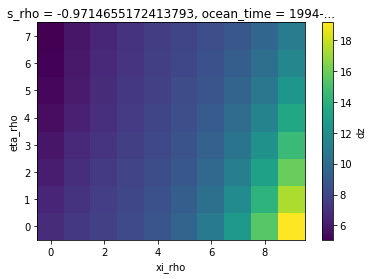

In [7]:
ds.dz[0,0,:,:].plot()

In [8]:
#Set constants, and sanity check that xgcm is calculating areas and volumes right.
Cp = 4181.3
Rho_0 = 1025 
# Calculate volume the romstools way
Volume = ds.h/(ds.pm*ds.pn)        
V0 = Volume.sum(['eta_rho', 'xi_rho'])           
# Calculate volume the xgcm way
V_A = (ds.dA*ds.h).sum(['eta_rho', 'xi_rho'])
# Check that they match
print(V_A.values,V0.values)

180394266745.01105 180394266745.01105


In [9]:
# n = (Cp*Rho_0*(grid.integrate(diag.temp_yadv,['X','Z']).sel(eta_rho=-1))*-1).load()
# s = (Cp*Rho_0*grid.integrate(diag.temp_yadv, ['X','Z']).sel(eta_rho=0)).load()
# w = (Cp*Rho_0*grid.integrate(diag.temp_xadv, ['Y','Z']).sel(xi_rho=0)).load()
# e = (Cp*Rho_0*grid.integrate(diag.temp_xadv, ['Y','Z']).sel(xi_rho=-1)*-1).load()
# tot_heat_adv = (n+s+e+w) #Total heat advection, which should be in Watts 

In [10]:
# fig = plt.figure(figsize=(12,8))
# n.plot(label='north')
# s.plot(label='south')
# e.plot(label='east')
# w.plot(label='west')
# plt.legend()
# plt.ylabel('Heat transport [W]')
# plt.title('heat transport into box [W]')
# #plt.savefig('heat_transport.png', dpi=300,bbox_inches='tight')

In [11]:
# # Surface heat flux 
# tot_Q = ((grid.integrate(ds.shflux*ds.h, ['X','Y']))/V0*Rho_0*Cp*10).load() 
# tot_Q.plot()

In [12]:
# calc_tendency = (tot_heat_adv - tot_Q) # Watts + Watts
# ADV_Q = (calc_tendency) # Watts is J/s, so we multiply by no. of seconds in a day to get a daily value in J.
# ADV_Q.plot()
# plt.title('total energy input from Qnet & advection [J]')

In [13]:
# day2seconds = (24*60*60)**-1

# temperature_tendency = (grid.integrate((diag.temp_rate), ['X','Y','Z'])) 
# temperature_tendency.cumsum().plot()

## Flux Divergence
First we define a function to calculate the convergence of the advective and diffusive fluxes, and return this as new dataset.

In [63]:
def tracer_flux_budget():
    """Calculate the convergence of fluxes of tracer. Return a new xarray.Dataset."""
    conv_horiz_adv_flux = diag.temp_hadv.rename('conv_horiz_adv_flux_TH')
    conv_horiz_diff_flux = diag.temp_hdiff.rename('conv_horiz_diff_flux_TH')
    # sign convention is opposite for vertical fluxes
    conv_vert_adv_flux = diag['temp_vadv'].rename('conv_vert_adv_flux_TH')
    conv_vert_diff_flux = diag['temp_vdiff'].rename('conv_vert_diff_flux_TH')

    all_fluxes = [conv_horiz_adv_flux, conv_horiz_diff_flux, conv_vert_adv_flux, conv_vert_diff_flux]
    conv_all_fluxes = sum(all_fluxes).rename('conv_total_flux_TH')
    
    return xr.merge(all_fluxes + [conv_all_fluxes])

In [64]:
budget_th = tracer_flux_budget()
budget_th

<xarray.Dataset>
Dimensions:                  (eta_rho: 8, ocean_time: 365, s_rho: 30, xi_rho: 10)
Coordinates:
    lat_rho                  (eta_rho, xi_rho) float64 dask.array<chunksize=(8, 10), meta=np.ndarray>
    lon_rho                  (eta_rho, xi_rho) float64 dask.array<chunksize=(8, 10), meta=np.ndarray>
  * s_rho                    (s_rho) float64 -0.9715 -0.9156 ... -0.004799
  * ocean_time               (ocean_time) datetime64[ns] 1994-01-01T12:00:00 ... 1994-12-31T12:00:00
Dimensions without coordinates: eta_rho, xi_rho
Data variables:
    conv_horiz_adv_flux_TH   (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 30, 8, 10), meta=np.ndarray>
    conv_horiz_diff_flux_TH  (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 30, 8, 10), meta=np.ndarray>
    conv_vert_adv_flux_TH    (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 30, 8, 10), meta=np.ndarray>
    conv_vert_diff_flux_TH   (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 30, 8, 10), meta=np.ndarray>
    conv_total_flux_TH       (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 30, 8, 10), meta=np.ndarray>

## Surface Fluxes
The surface fluxes are only active in the top model layer. We need to multiply by some constants to convert to the proper units and scale factors to convert to integral form. They also require some xarray special sauce to merge with the 3D variables.

In [70]:
surf_flux_th = ((ds.shflux*86400) / (Cp * Rho_0 * V0))

# in order to align the surface fluxes with the rest of the 3D budget terms,
# we need to give them a z coordinate. We can do that with this function
def surface_to_3d(da):
    da.coords['s_rho'] = ds.s_rho[0]
    return da.expand_dims(dim='s_rho', axis=1)

In [71]:
budget_th['surface_flux_conv_TH'] = surface_to_3d(surf_flux_th).load()
budget_th.surface_flux_conv_TH

<xarray.DataArray 'surface_flux_conv_TH' (ocean_time: 365, s_rho: 30, eta_rho: 8, xi_rho: 10)>
array([[[[ 4.00365621e-12,  3.88840628e-12,  3.78705290e-12, ...,
           2.96083724e-12,  2.62459992e-12,  2.26309748e-12],
         [ 4.34555863e-12,  4.28926479e-12,  4.23101253e-12, ...,
           3.51328801e-12,  3.23405454e-12,  2.95029461e-12],
         [ 4.62934734e-12,  4.67746814e-12,  4.70595013e-12, ...,
           4.12541745e-12,  3.92194036e-12,  3.72183360e-12],
         ...,
         [ 6.42079015e-12,  6.67492709e-12,  6.64399600e-12, ...,
           6.07553359e-12,  6.01472139e-12,  5.99320814e-12],
         [ 7.24139527e-12,  7.28454370e-12,  7.19187961e-12, ...,
           6.69608737e-12,  6.67711018e-12,  6.71740368e-12],
         [ 7.82825681e-12,  7.78297772e-12,  7.69172809e-12, ...,
           7.30498737e-12,  7.34934565e-12,  7.43580281e-12]],

        [[            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         ...,
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan]],

        [[            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         ...,
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan]],

        ...,

        [[            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         ...,
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan]],

        [[            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         ...,
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,         

# Add it all up
The total tendency should be given by: 
Note that the surface flux is only active in the top layer, hence the nan filling.

In [72]:
budget_th['total_tendency_TH'] = (budget_th.conv_total_flux_TH) + (budget_th.surface_flux_conv_TH.fillna(0.))
budget_th

<xarray.Dataset>
Dimensions:                  (eta_rho: 8, ocean_time: 365, s_rho: 30, xi_rho: 10)
Coordinates:
  * s_rho                    (s_rho) float64 -0.9715 -0.9156 ... -0.004799
    lat_rho                  (eta_rho, xi_rho) float64 dask.array<chunksize=(8, 10), meta=np.ndarray>
    lon_rho                  (eta_rho, xi_rho) float64 dask.array<chunksize=(8, 10), meta=np.ndarray>
  * ocean_time               (ocean_time) datetime64[ns] 1994-01-01T12:00:00 ... 1994-12-31T12:00:00
Dimensions without coordinates: eta_rho, xi_rho
Data variables:
    conv_horiz_adv_flux_TH   (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 30, 8, 10), meta=np.ndarray>
    conv_horiz_diff_flux_TH  (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 30, 8, 10), meta=np.ndarray>
    conv_vert_adv_flux_TH    (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 30, 8, 10), meta=np.ndarray>
    conv_vert_diff_flux_TH   (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 30, 8, 10), meta=np.ndarray>
    conv_total_flux_TH       (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 30, 8, 10), meta=np.ndarray>
    surface_flux_conv_TH     (ocean_time, s_rho, eta_rho, xi_rho) float64 4.004e-12 ... nan
    total_tendency_TH        (ocean_time, s_rho, eta_rho, xi_rho) float64 dask.array<chunksize=(1, 30, 8, 10), meta=np.ndarray>

## Include the “truth”

In [73]:
budget_th['total_tendency_TH_truth'] = diag.temp_rate 

Text(0, 0.5, 'temperature rate of change [degC/day]')

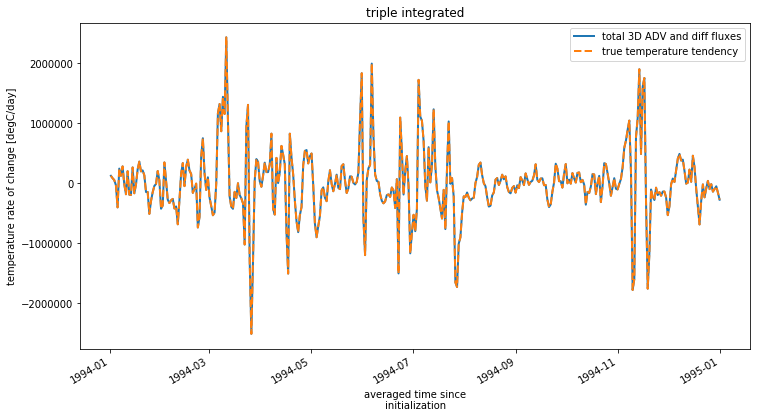

In [74]:
plt.figure(figsize=(12,6))
(grid.integrate(budget_th.total_tendency_TH,['X','Y','Z'])).plot(linewidth=2, label = 'total 3D ADV and diff fluxes')
(grid.integrate(budget_th.total_tendency_TH_truth,['X','Y','Z'])).plot(linestyle='--', linewidth=2, label='true temperature tendency')
plt.legend()
plt.title('triple integrated')
plt.ylabel('temperature rate of change [degC/day]')

Text(0, 0.5, 'temperature rate of change [degC/day]')

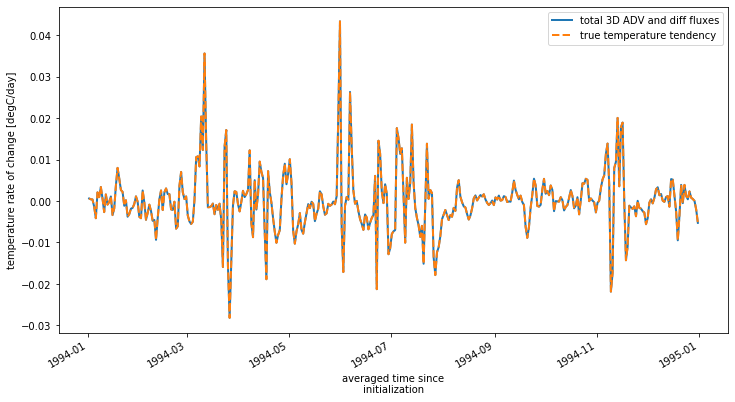

In [75]:
plt.figure(figsize=(12,6))
(budget_th.total_tendency_TH.sum(dim=['s_rho', 'eta_rho', 'xi_rho'])).plot(linewidth=2, label = 'total 3D ADV and diff fluxes')
(budget_th.total_tendency_TH_truth.sum(dim=['s_rho', 'eta_rho', 'xi_rho'])).plot(linestyle='--', linewidth=2, label='true temperature tendency')
plt.legend()
plt.ylabel('temperature rate of change [degC/day]')

Text(0, 0.5, 'temperature rate of change [degC/day]')

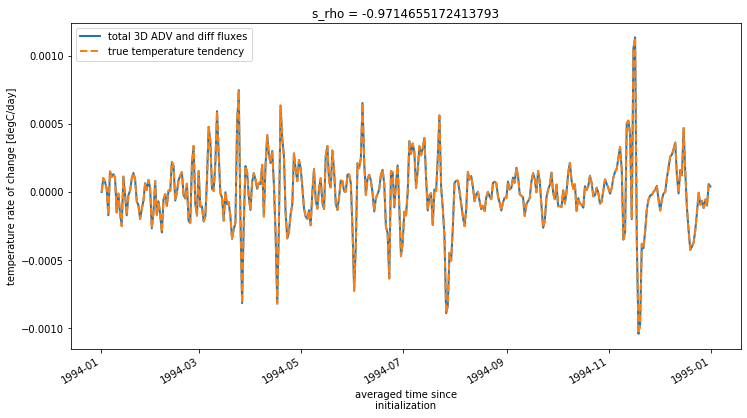

In [76]:
# Just the surface layer
plt.figure(figsize=(12,6))
(budget_th.total_tendency_TH[:,0,:,:].sum(dim=['eta_rho', 'xi_rho'])).plot(linewidth=2, label = 'total 3D ADV and diff fluxes')
(budget_th.total_tendency_TH_truth[:,0,:,:].sum(dim=['eta_rho', 'xi_rho'])).plot(linestyle='--', linewidth=2, label='true temperature tendency')
plt.legend()
plt.ylabel('temperature rate of change [degC/day]')

# Validate Budget¶
Now we do some checks to verify that the budget adds up.

## Vertical and Horizontal Integrals of Budget
We will take an average over the first 10 timesteps

In [77]:
time_slice = dict(ocean_time=slice(0, 100))

In [78]:
def check_horizontal(budget, suffix):
    ds_chk = (budget[[f'total_tendency_{suffix}', f'total_tendency_{suffix}_truth']]
              .sum(dim=['s_rho', 'xi_rho']).mean(dim='ocean_time'))
    return ds_chk

def check_vertical(budget, suffix):
    ds_chk = (budget[[f'total_tendency_{suffix}', f'total_tendency_{suffix}_truth']]
              .sum(dim=['eta_rho', 'xi_rho']).mean(dim='ocean_time'))
    return ds_chk

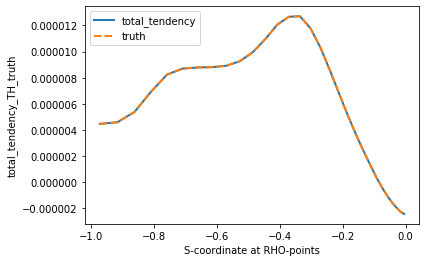

In [79]:
th_vert = check_vertical(budget_th.isel(**time_slice), 'TH').load()
th_vert.total_tendency_TH.plot(linewidth=2, label = 'total_tendency')
th_vert.total_tendency_TH_truth.plot(linestyle='--', linewidth=2, label='truth')
plt.legend()


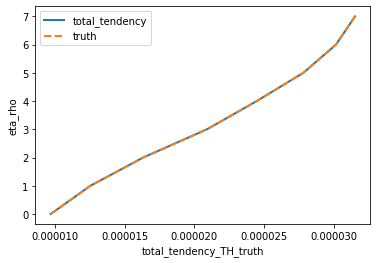

In [80]:
th_horiz = check_horizontal(budget_th.isel(**time_slice), 'TH').load()
th_horiz.total_tendency_TH.plot(linewidth=2, y='eta_rho',label='total_tendency')
th_horiz.total_tendency_TH_truth.plot(linestyle='--', linewidth=2, y='eta_rho',label='truth')
plt.legend()

In [86]:
budget_th_box = (budget_th.isel(s_rho=0).sum(dim=['eta_rho','xi_rho'])).load()
budget_th_box

<xarray.Dataset>
Dimensions:                  (ocean_time: 365)
Coordinates:
    s_rho                    float64 -0.9715
  * ocean_time               (ocean_time) datetime64[ns] 1994-01-01T12:00:00 ... 1994-12-31T12:00:00
Data variables:
    conv_horiz_adv_flux_TH   (ocean_time) float32 -0.00034157006 ... -0.00058946566
    conv_horiz_diff_flux_TH  (ocean_time) float32 -1.6037733e-05 ... -7.245576e-06
    conv_vert_adv_flux_TH    (ocean_time) float32 0.0003544718 ... 0.0006336139
    conv_vert_diff_flux_TH   (ocean_time) float32 1.6577237e-06 ... 1.8063386e-06
    conv_total_flux_TH       (ocean_time) float32 -1.4783118e-06 ... 3.8709033e-05
    surface_flux_conv_TH     (ocean_time) float64 4.293e-10 ... 2.089e-10
    total_tendency_TH        (ocean_time) float64 -1.478e-06 ... 3.871e-05
    total_tendency_TH_truth  (ocean_time) float32 -1.4783081e-06 ... 3.8709033e-05

Text(0, 0.5, 'temperature rate of change [degC/s]')

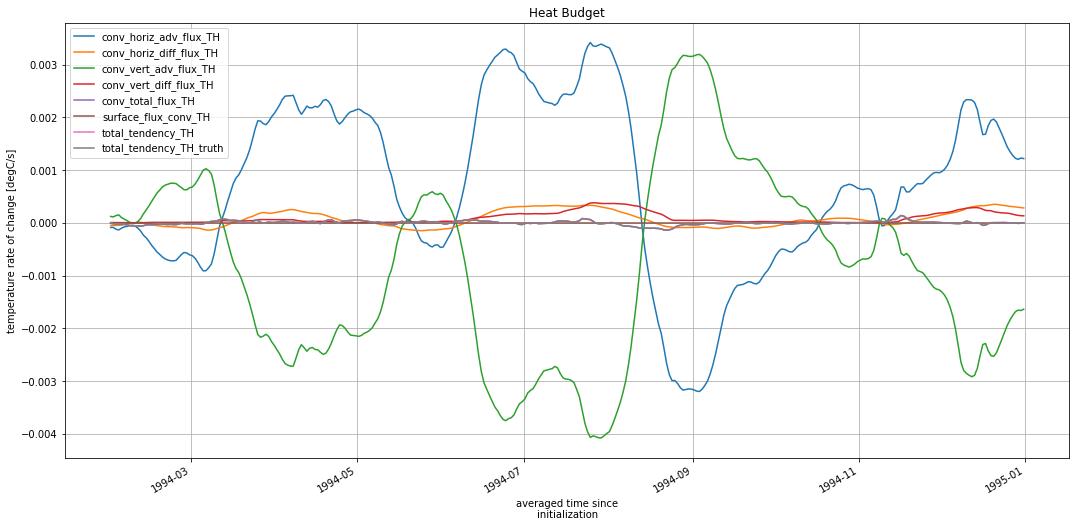

In [92]:
plt.figure(figsize=(18,8))
for v in budget_th_box.data_vars:
    budget_th_box[v].rolling(ocean_time=30).mean().plot(label=v)
#plt.ylim([-0.005, 0.005])
plt.legend()
plt.grid()
plt.title('Heat Budget')
plt.ylabel('temperature rate of change [degC/s]')

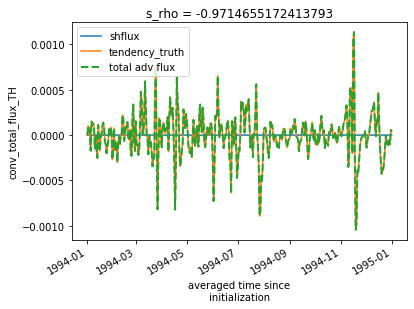

In [88]:
budget_th_box.surface_flux_conv_TH.plot(label='shflux')
budget_th_box.total_tendency_TH_truth.plot(label='tendency_truth')
budget_th_box.conv_total_flux_TH.plot(linestyle='--', linewidth=2,label='total adv flux')
plt.legend()

## Sum up terms in surface layer over length of the timeseries and plot as bar chart

In [104]:
budget_th_tot = (budget_th.isel(s_rho=0).sum(dim=['eta_rho','xi_rho','ocean_time'])).load()

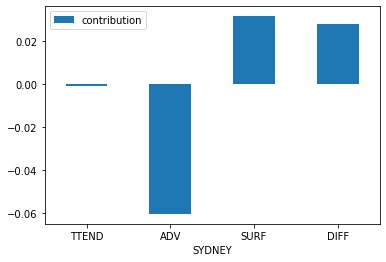

In [105]:
ADV = budget_th_tot.conv_horiz_adv_flux_TH + budget_th_tot.conv_vert_adv_flux_TH
import pandas as pd
df = pd.DataFrame({'SYDNEY':['TTEND', 'ADV', 'SURF', 'DIFF'], 'contribution':[budget_th_tot.total_tendency_TH_truth.values
                                                             ,ADV.values
                                                             ,budget_th_tot.conv_vert_diff_flux_TH.values
                                                             ,budget_th_tot.conv_horiz_diff_flux_TH.values]})
df.contribution=df.contribution.astype(float)
ax = df.plot.bar(x='SYDNEY', y='contribution', rot=0)

In [37]:
df2

NameError: name 'df2' is not defined